In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cancer.csv')
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


data.isnull().sum()

In [4]:
# Your DataFrame with categorical data
df = pd.DataFrame({'Level': ['low', 'medium', 'high']})
print(f"Before Mapping the Data:\n\n{df}\n")

# Define the mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Map the categorical data to numeric values
df['level_label'] = df['Level'].map(mapping)

# Load your existing DataFrame
data = pd.read_csv('cancer.csv')

# Map the 'Level' column in the existing DataFrame
data['level_label'] = data['Level'].map(mapping)

# Now, 'level_label' column is appended to your existing DataFrame 'data'
print(data)


Before Mapping the Data:

    Level
0     low
1  medium
2    high

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6    

<Axes: ylabel='Frequency'>

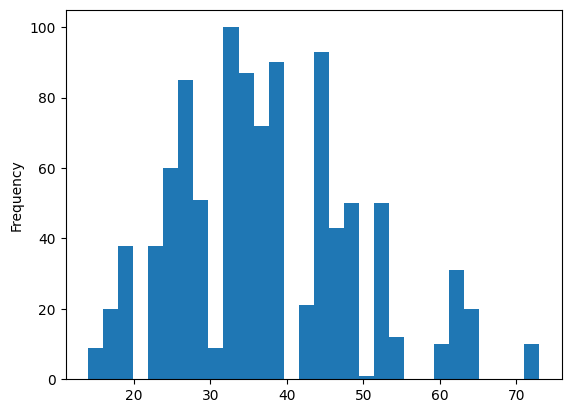

In [5]:
data['Age'].plot.hist(bins=30)

73 14 59 6
[14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74]


<Axes: xlabel='age_category'>

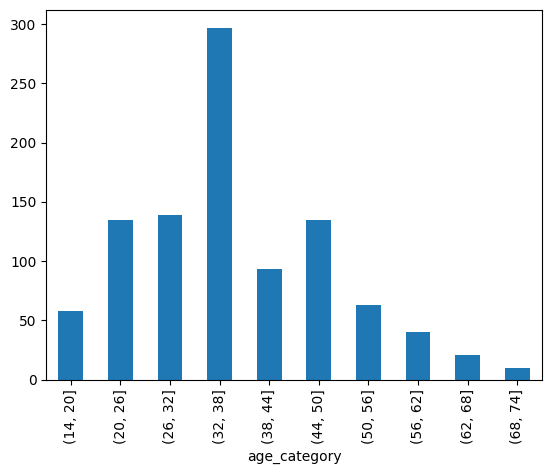

In [13]:
max_age = int(np.ceil(np.max(data['Age'])))
min_age= int(np.ceil(np.min(data['Age'])))
value = max_age - min_age
width = int(np.round(value/10))
print(max_age, min_age, value, width)
intervals = [age for age in range(min_age,max_age+width,width)]
print(intervals)
data['age_category'] = pd.cut(data['Age'],bins=intervals)
data['age_category']
data.groupby('age_category')['Age'].count().plot(kind='bar')